In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy
import plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode

In [4]:
def mainroot(a,b,c,d):
    Tmax = -1 * np.sqrt((b-d)**2 +(a-c)**2)
    return Tmax

In [5]:
def newPQ(a,b,c,d,p,q):
    m=(d-b)/(c-a)
    x1=((p/m)+q+(m*a)-b)/(m +(1/m))
    y1= m*(x1-a)+b
    newQ= - np.sqrt((b-y1)**2 +(a-x1)**2)
    newP= np.sqrt((p-x1)**2 +(q-y1)**2)
    if p < x1:
        newP=-newP
    return (newP, newQ)

In [6]:
def findBest(Tmax,G,p,q,a):
    t=0
    bestLength= 1000000000000.0
    bestT = t
    while t >= Tmax:
        b = (q - G * (p**2) - t)/p
        if p>0:
            x =np.linspace(0, p, num=50)
        elif p < 0:
            x =np.linspace(p, 0, num=50)
        lot = np.sqrt(1+(2*G*x + ((q-G*(p**2)-t)/p))**2)
        y= a*(lot) +(1-a)*(lot - t)
        length = scipy.integrate.trapezoid(y,x)
        if length < bestLength:
            #ploting(Tmax,p,q,bestT,G) #comparing possible lines
            bestLength = length
            bestT = t
        t = t - 0.01 #last 
    #ploting(Tmax,p,q,bestT,G)
    #print("length: " + str(bestLength) +" t= " + str(bestT))
    return(bestLength,bestT)

In [7]:
def pointGivenT(a,b,c,d,t):
    m= (d-b)/(c-a)
    qa= m**2 +1
    qb= -2*a -2*a*(m**2)
    qc= a**2 +(a**2)*(m**2) - (t**2)
    x1= (-qb + np.sqrt(qb**2 -(4*qa*qc)))/(2*qa)
    if (x1 <a and x1 <c) or (x1>a and x1>c):
        x1= (-qb - np.sqrt(qb**2 -(4*qa*qc)))/(2*qa)
    y1 = m*(x1-a)+b
    return(x1,y1)

In [8]:
def pointGivenPoint(a,b,c,d,g1,h1,p,xt):
    x1y1= pointGivenT(a,b,c,d,h1)
    x1 =x1y1[0]
    y1=x1y1[1]
    m= (d-b)/(c-a)
    m= -1/m
    qa= m**2 +1
    qb= -2*x1 -2*x1*(m**2)
    qc= x1**2 +(x1**2)*(m**2) - (g1**2)
    g= (-qb - np.sqrt(qb**2 -(4*qa*qc)))/(2*qa)
    #if g >xt:
        #g= (-qb + np.sqrt(qb**2 -(4*qa*qc)))/(2*qa)
    h = m*(g-x1)+y1
    return(g,h)

In [9]:
def bestTAngled(a,b,c,d,p,q,G,al):
    Tmax = mainroot(a,b,c,d)
    pqArray= newPQ(a,b,c,d,p,q)
    bestArray= findBest(Tmax,G,pqArray[0],pqArray[1],al)
    length = bestArray[0]
    t= bestArray[1]
    point = pointGivenT(a,b,c,d,t)
    dArray =[t, pqArray[0], pqArray[1]]
    return(length,point[0],point[1],dArray)

In [10]:
def angledMPlot(a,b,c,d):
    if a >c:
        x=np.linspace(c,a, num =50)
    else:
        x= np.linspace(a,c, num =50)
    m= (b-d)/(a-c)
    y = m*(x-a)+b
    main =go.Scatter(x=x,y=y,mode='lines', name= "main root")
    return (main)

In [11]:
def deAngledMPlot(a,b,c,d):
    Tmax = mainroot(a,b,c,d)
    y = np.linspace(Tmax, 0)
    x= 0*y
    main = go.Scatter(x=x,y=y, mode='lines', name = "mainroot")
    return main

In [12]:
def plotA(a,b,c,d,gs,hs,length,p,xt):
    x=[]
    y=[]
    for i in range(0, len(gs)):
        g1=gs[i]
        h1=hs[i]
        point =pointGivenPoint(a,b,c,d,g1,h1,p,xt)
        g =point[0]
        h=point[1]
        x.append(g)
        y.append(h)
    print(x)
    print(y)
    trace =go.Scatter(x=x,y=y, mode='lines', name =str(length))
    return trace

In [13]:
def plotD(G,al, Tmax, length,t, p,q):
    x1=np.linspace(0,p)
    b=(q - G*(p**2) -t)/p
    y1=G * x1**2 + b*x1 + t
    trace2 =go.Scatter(x=x1,y=y1,mode='lines', name= str(length))
    return (trace2, x1,y1)

enter a:  2
enter b:  4
enter c:  10
enter d:  -10


-16.1245154965971


enter G:  0
enter alpha value:  .9
enter the number of points you would like to do:  1
enter p value for point: 1 -3
endter q value for point: 1 -7


[2.0, 1.89795918367347, 1.7959183673469379, 1.6938775510204076, 1.5918367346938778, 1.4897959183673473, 1.3877551020408172, 1.2857142857142856, 1.1836734693877549, 1.0816326530612246, 0.9795918367346935, 0.8775510204081638, 0.7755102040816321, 0.6734693877551013, 0.571428571428571, 0.4693877551020403, 0.3673469387755102, 0.26530612244897983, 0.16326530612244913, 0.06122448979591843, -0.04081632653061228, -0.142857142857143, -0.2448979591836737, -0.3469387755102044, -0.44897959183673514, -0.5510204081632658, -0.6530612244897959, -0.7551020408163266, -0.8571428571428573, -0.959183673469388, -1.0612244897959193, -1.1632653061224487, -1.2653061224489788, -1.3673469387755102, -1.469387755102041, -1.5714285714285696, -1.673469387755101, -1.775510204081633, -1.8775510204081638, -1.9795918367346939, -2.0816326530612246, -2.183673469387755, -2.2857142857142865, -2.3877551020408174, -2.4897959183673466, -2.5918367346938775, -2.6938775510204094, -2.7959183673469394, -2.8979591836734704, -3.000000

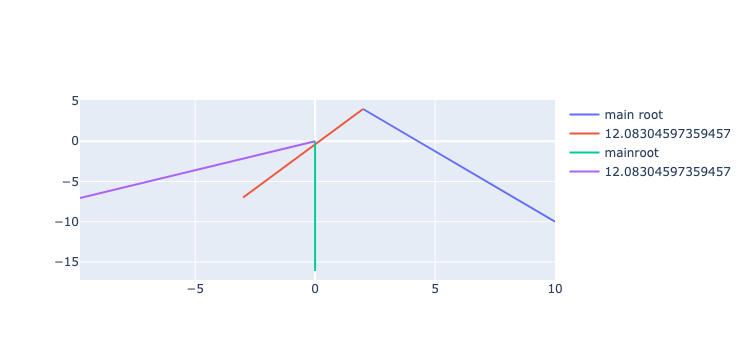

In [19]:
a = float(input("enter a: "))
b = float(input("enter b: ") )
c = float(input("enter c: "))
d = float(input("enter d: "))
AngledPlot = []
deAngledPlot=[]
Tmax = mainroot(a,b,c,d)
print(Tmax)
AngledPlot.append(angledMPlot(a,b,c,d))
deAngledPlot.append(deAngledMPlot(a,b,c,d))
G = float(input("enter G: "))
al = float(input("enter alpha value: "))
numPoints = int(input("enter the number of points you would like to do: "))
point=1
listOfTs=[["lenght","xt","yt","t"]]
while point < (numPoints+1):
    p = float(input("enter p value for point: " +str(point)))
    q = float(input("endter q value for point: " + str(point)))
    Array = bestTAngled(a,b,c,d,p,q,G,al)
    #dArray =[t, pqArray[0], pqArray[1]]
    #Array =(length,xt,xy,dArray)
    dArray= Array[3]
    dlineArray = plotD(G,al,Tmax, Array[0], dArray[0],dArray[1],dArray[2])
    deAngledPlot.append(dlineArray[0])
    AngledPlot.append(plotA(a,b,c,d,dlineArray[1],dlineArray[2],Array[0],p,Array[1]))
    printArray=[Array[0], Array[1],Array[2],dArray[0]]
    listOfTs.append(printArray)
    point = point+1
print (listOfTs)
#iplot(AngledPlot)
#iplot(deAngledPlot)
iplot(AngledPlot +deAngledPlot)

In [20]:
np.sqrt(8**2 + 14**2)

16.1245154965971